data4/프로야구.csv 를 이용하여 아래를 작성하시요.

target: 2018년 연봉 
나머지:feature(선수명은 제거)

1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) 
heatmap을그리고
다중공선성 컬럼을 확인하고
다중공선성이 높은 컬럼을 제거후
SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

5, 6, 7 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)


In [74]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')
df = pd.read_csv('data4/프로야구.csv')

display(df)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


1번

In [68]:
df = pd.read_csv('data4/프로야구.csv')
# 선수명 제거
df = df.iloc[:, 1:]

# 인코딩
df = pd.get_dummies(df, columns=['팀명'])

# x_data = feature / y_data = target 으로 지정
x_data = df.drop('연봉(2018)', axis=1)
y_data = df['연봉(2018)']

# 훈련, 테스트 세트 분류
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

# 1) SGDRegress 모델 r2(train, test) 를 출력
from sklearn.linear_model import SGDRegressor
model_SGDR = make_pipeline(StandardScaler(), SGDRegressor() )
model_SGDR.fit(x_train, y_train)

# 1번 문제 점수 확인 
print(model_SGDR.score(x_train,y_train))
print(model_SGDR.score(x_test,y_test))

#0.9343338673617033
#0.7646011792857125 # 과적합 상태

0.9332829038378263
0.775416265927458


2번

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[-1.26271319e+16 -5.48179233e+14 -4.44192245e+14 -7.61336172e+14
 -5.08605516e+15]
[-3.16638175e+08 -1.32387761e+14 -8.26768033e+09 -2.69144971e+11
 -1.20623851e+15]


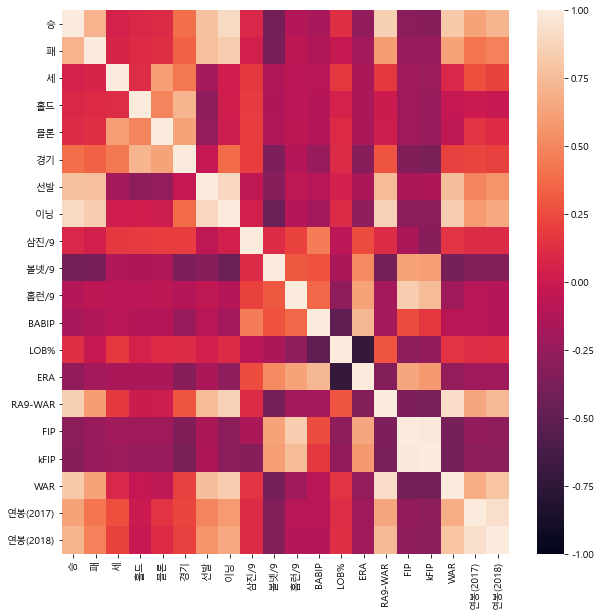

In [73]:
# 데이터 불러오기
df = pd.read_csv('data4/프로야구.csv')

# 데이터프레임 열 순서 바꾸기
new_col_order = df.columns[:-2].to_list()
new_col_order.append('연봉(2017)')
new_col_order.append('연봉(2018)')
new_df = df[new_col_order]


# 이름제거
without_name = new_df.iloc[:,1:]


# feature 뽑고 One hot encoding
feature = without_name.iloc[:,:-1]
feature = pd.get_dummies(feature)

# target 뽑기
target = without_name.iloc[:,-1]


# 크게크게
plt.figure(figsize=(10,10))

# 히트맵
sns.heatmap(new_df.corr(),vmax=1,vmin=-1)


# 다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(feature.values, i )  for i in range( feature.shape[1] ) ]
vif['features'] = feature.columns

# 다중 공선성이 10이상인 것들의 index 취합
bad_vif_index = vif[vif['VIF Factor']>=10].index

# 삭제
vif.drop(bad_vif_index,inplace=True)

# 좋은 feature들만 모아모아
good_feature_list = vif['features'].to_list()

# 새로운 feature를 만든다
good_feature = feature[good_feature_list]


# train test split
x_train, x_test, y_train, y_test =  train_test_split(good_feature,target,test_size=0.2,random_state=1)


# SGD Regressor로 모델 만들기
model = make_pipeline(PolynomialFeatures(degree=4),StandardScaler(),SGDRegressor())
model.fit(x_train,y_train)


# train과 test로 r2 score 뽑아보기
r2_scores_train = cross_val_score(model , x_train , y_train , cv =5, scoring='r2' , verbose=1)
r2_scores_test = cross_val_score(model , x_test , y_test , cv =5, scoring='r2' , verbose=1)

print(r2_scores_train)

print(r2_scores_test)

3번

In [70]:
# 최적의 파라미터 값 찾기
modelLasso = Pipeline([('scl', StandardScaler()), ('clf', Lasso()),])
param_value = {'clf__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4]}
gridSearch = GridSearchCV(modelLasso, param_grid = param_value, cv = 10, verbose = 1, scoring = 'r2')
gridSearch.fit(x_train, y_train)

# best 모델
gridSearch.best_estimator_

# best model의 파라미터 설정
model_lasso = make_pipeline(StandardScaler(), Lasso(alpha = 4))
model_lasso.fit(x_train, y_train)

# train, test score
print('train score:', model_lasso.score(x_train, y_train))
print('test score:', model_lasso.score(x_test, y_test))

Fitting 10 folds for each of 7 candidates, totalling 70 fits
train score: 0.9077741567085362
test score: 0.6809369559021161


4번

In [87]:
#문제4 팀별, 연도별 연봉 평균을 구해보기

df = pd.read_csv('data4/프로야구.csv')

# df.groupby( ['연도별', 팀명'])
df_2017 = df['연봉(2017)'].groupby(df['팀명'])
display(df_2017.sum().sort_values(ascending=False))

df_2018 = df['연봉(2018)'].groupby(df['팀명'])
display(df_2018.sum().sort_values(ascending=False))

팀명
한화     429800
KIA    344800
LG     341900
롯데     325700
삼성     323400
두산     252800
SK     231100
NC     131800
KT     127500
Name: 연봉(2017), dtype: int64

팀명
KIA    441600
한화     434400
LG     422000
롯데     373900
SK     310600
삼성     284400
두산     269700
KT     193500
NC     147600
Name: 연봉(2018), dtype: int64

5번

In [71]:
#문제5. 전년도(2017)와 비교해 연봉이 오른 순서대로 상위 5명 출력하시오
df = pd.read_csv('data4/프로야구.csv')
df['연봉 증감']= df['연봉(2018)']-df['연봉(2017)']
result= df.sort_values('연봉 증감',ascending=False).head(5)
result['선수명']

2     양현종
1      소사
0      켈리
5    피어밴드
4     레일리
Name: 선수명, dtype: object

6번

In [72]:
#문제6, 각 팀 중 연봉의 평균이 가장 높은 선수를 구하시오
df = pd.read_csv('data4/프로야구.csv')
df['연봉평균']=(df['연봉(2018)']+df['연봉(2017)'])/2
df
df_sort_group_top1 = df.sort_values(by="연봉평균", ascending=False).groupby("팀명").head(1)
df_sort_group_top1[['선수명','팀명','연봉평균']]

,선수명,팀명,연봉평균
2,양현종,KIA,190000.0
20,정우람,한화,120000.0
0,켈리,SK,112500.0
3,차우찬,LG,100000.0
7,장원준,두산,100000.0
4,레일리,롯데,98000.0
10,윤성환,삼성,80000.0
5,피어밴드,KT,60000.0
39,임창민,NC,23750.0
